### 繪台股走勢圖-日線
##### https://www.twse.com.tw/zh/page/trading/exchange/FMNPTK.html

In [1]:
import urllib.request
import csv
import matplotlib.pyplot as plt
from datetime import datetime
import requests
from contextlib import closing
import os

In [2]:
url = 'https://www.twse.com.tw/exchangeReport/FMNPTK?response=csv&stockNo=2330'

In [3]:
def appendData(row):
    try:
        year = int(row[0]) + 1911
        high = float(row[4])
        low = float(row[6])
        price = float(row[8])
    except Exception:
        print('%s --> 有少值' % row)
    else:
        years.append(year)
        highs.append(high)
        lows.append(low)
        prices.append(price)

In [4]:
def download(url, file_name):
    get_response = requests.get(url,stream=True)
    with open(file_name, 'wb') as f:
        for chunk in get_response.iter_content(chunk_size=1024):
            if chunk: # filter out keep-alive new chunks
                f.write(chunk)

In [5]:
def way1():
    with closing(requests.get(url, stream=True)) as req:
        fileData = (line.decode('big5') for line in req.iter_lines())
        csvReader = csv.reader(fileData, delimiter=',', quotechar='"')
        listCsv = list(csvReader)
        csvData = listCsv[2:-6]
        for row in csvData:
            appendData(row)

In [6]:
def way2():
    fn = 'FMNPTK_2330.csv'
    download(url, fn)
    with open (fn) as csvFile:
        csvReader = csv.reader(csvFile)
        listCsv = list(csvReader)
        csvData = listCsv[2:-6]
        for row in csvData:
            appendData(row)

In [7]:
def drawplot():
    fig = plt.figure(dpi=80, figsize=(12, 8))
    plt.plot(years, highs, '-o', label='High') 
    plt.plot(years, lows, '-x', label='Low') 
    plt.plot(years, prices, '-^', label='Price') 
    plt.legend(loc='best') 
    fig.autofmt_xdate() 
    plt.title("Taiwan Cement Company", fontsize=24)
    plt.xlabel("", fontsize=14) 
    plt.xlabel("", fontsize=14) 
    plt.tick_params(axis="both", labelsize=12, color='red') 
    plt.show()

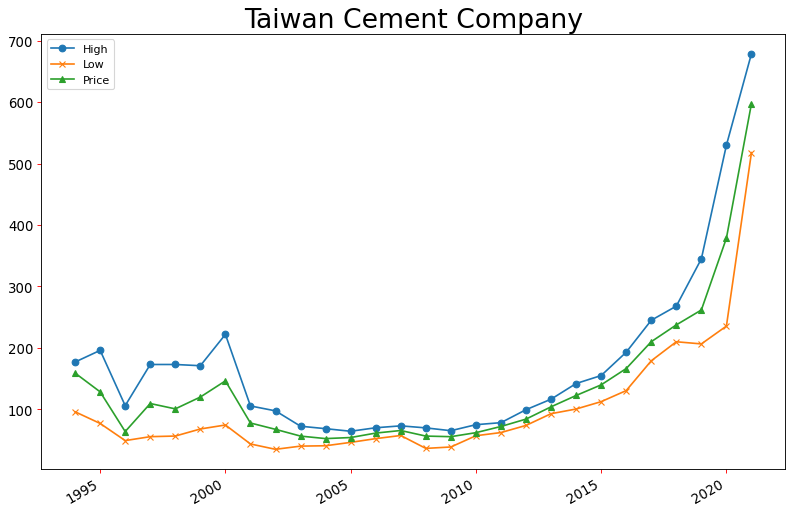

In [8]:
years, highs, lows, prices = [],[], [], []
way1()
drawplot()

#### https://matplotlib.org/3.5.0/api/_as_gen/matplotlib.pyplot.plot.html

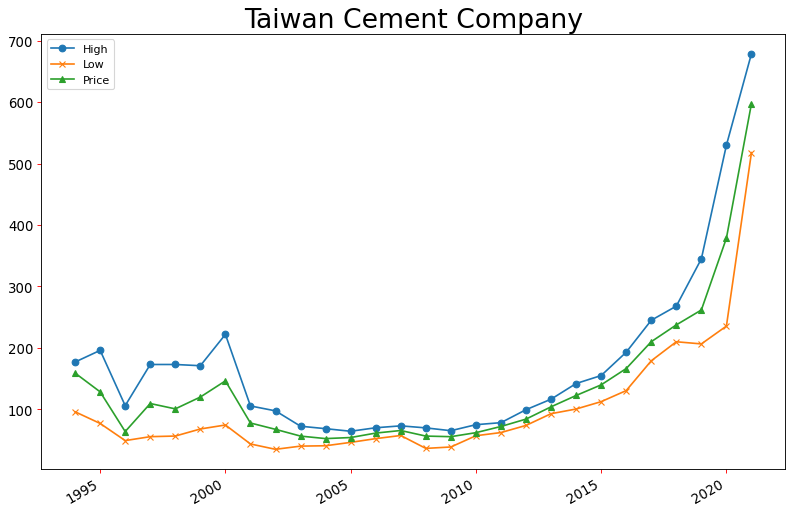

In [9]:
years, highs, lows, prices = [],[], [], []
way2()
drawplot()